In [1]:
%autosave 20

Autosaving every 20 seconds


# CAR PRICE PREDICTOR

## Dataset - https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('data/carData.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.shape

(301, 9)

In [7]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [10]:
#get carAge and add to data
df['currentYear']=2020
df['carAge']=df['currentYear']-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,currentYear,carAge
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
#drop unnecessary columns
df=df.drop(['Car_Name','Year','currentYear'],axis=1)

In [12]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'carAge'],
      dtype='object')

In [13]:
# convert categorical features using one-hot encoding
df=pd.get_dummies(df,drop_first=True) 
# we are dropping one column for each categorical variable becuase there is corellation between varialbels. 
# eg - if a column has male/female values, there is no need to have 2 columns (col_male, col_female) in the
# OneHot encoded columns because if Male=0 for a row, automatically female=1 and vise-versa. So we can get all
# info by having just 1 column.

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [15]:
#find correlation
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
carAge,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [16]:
#visual 
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


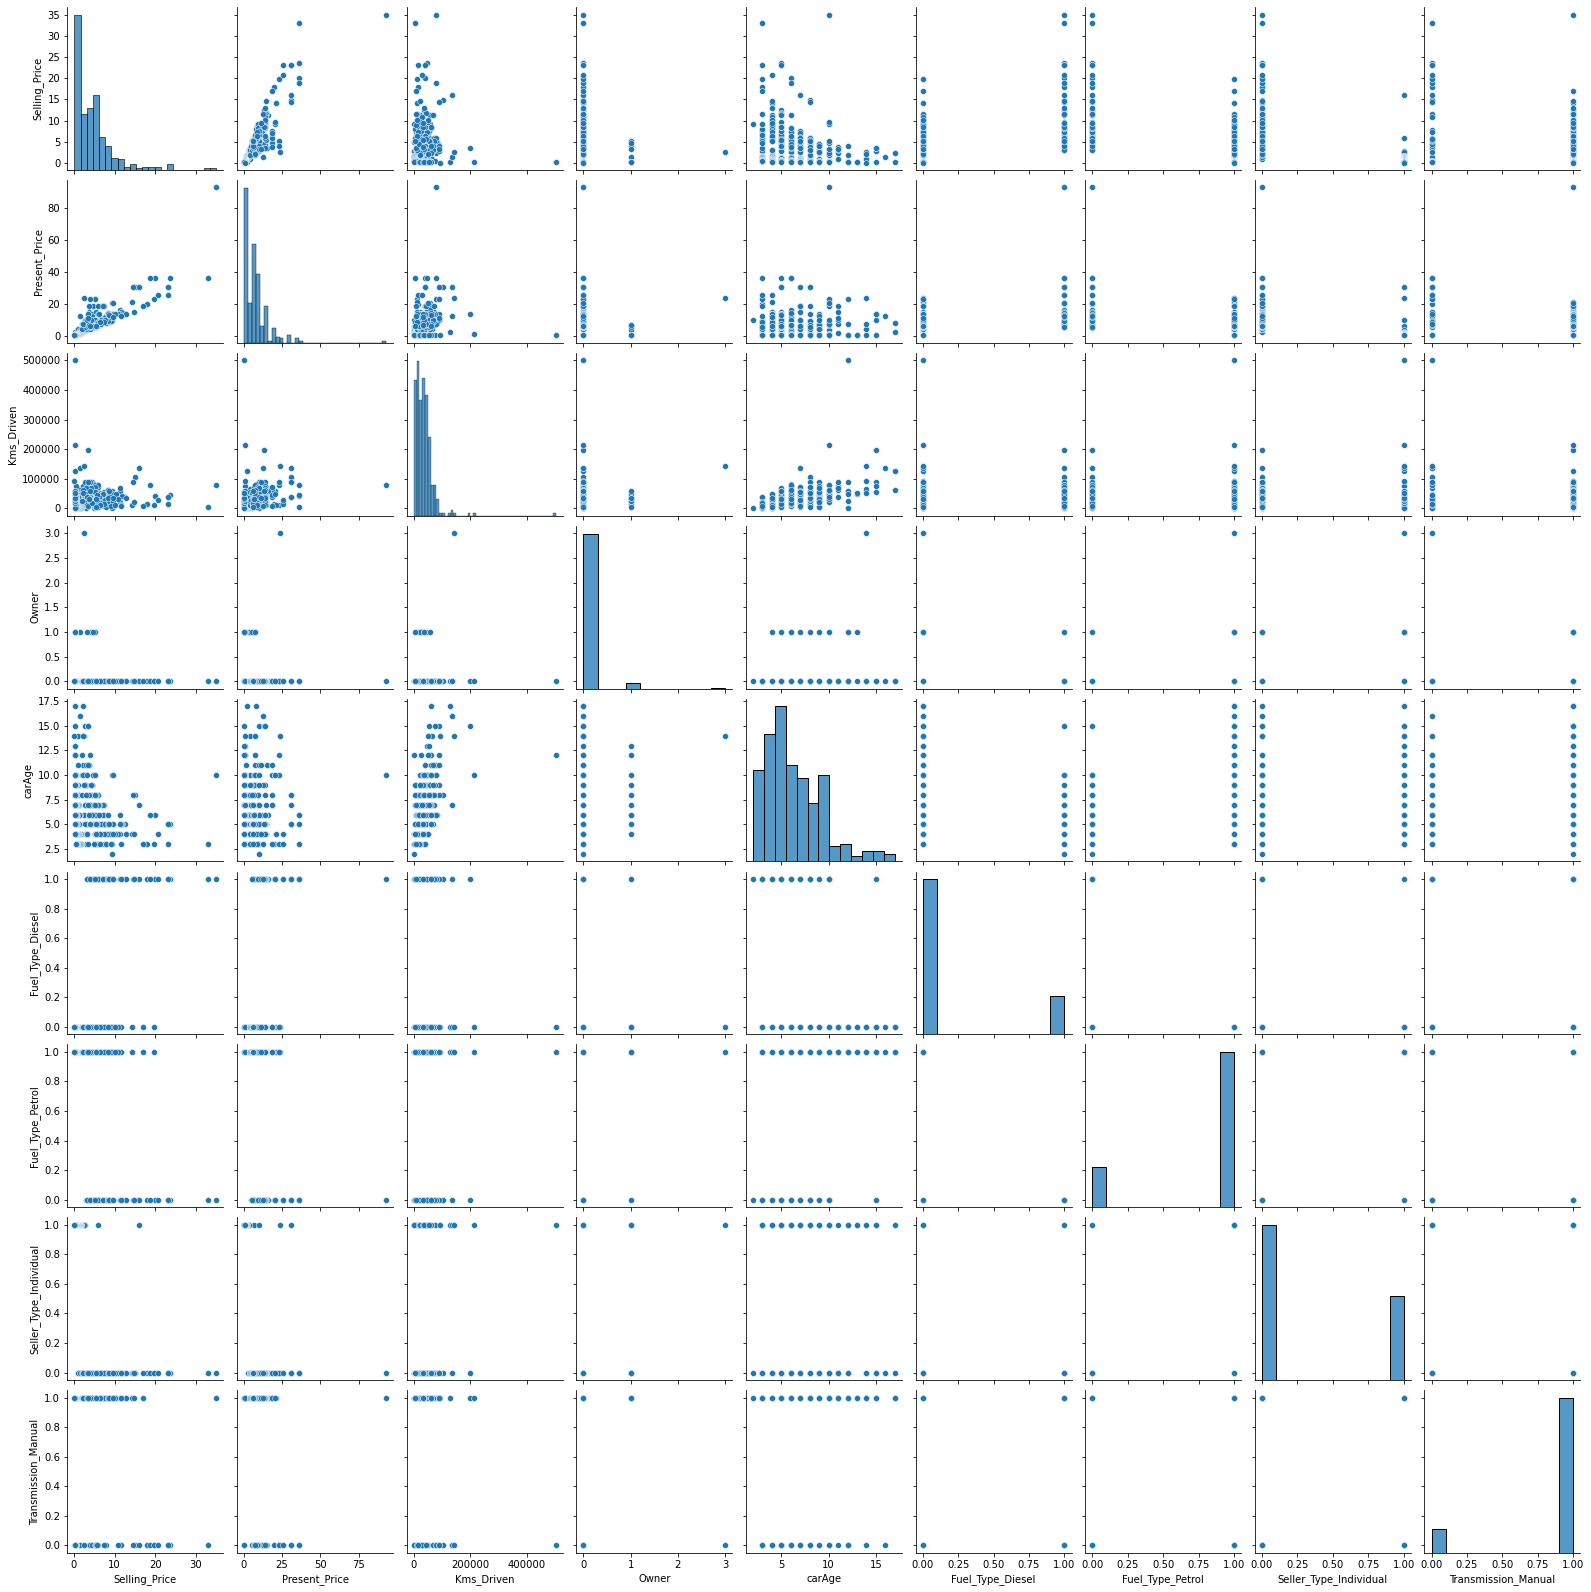

In [17]:
sns.pairplot(df)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

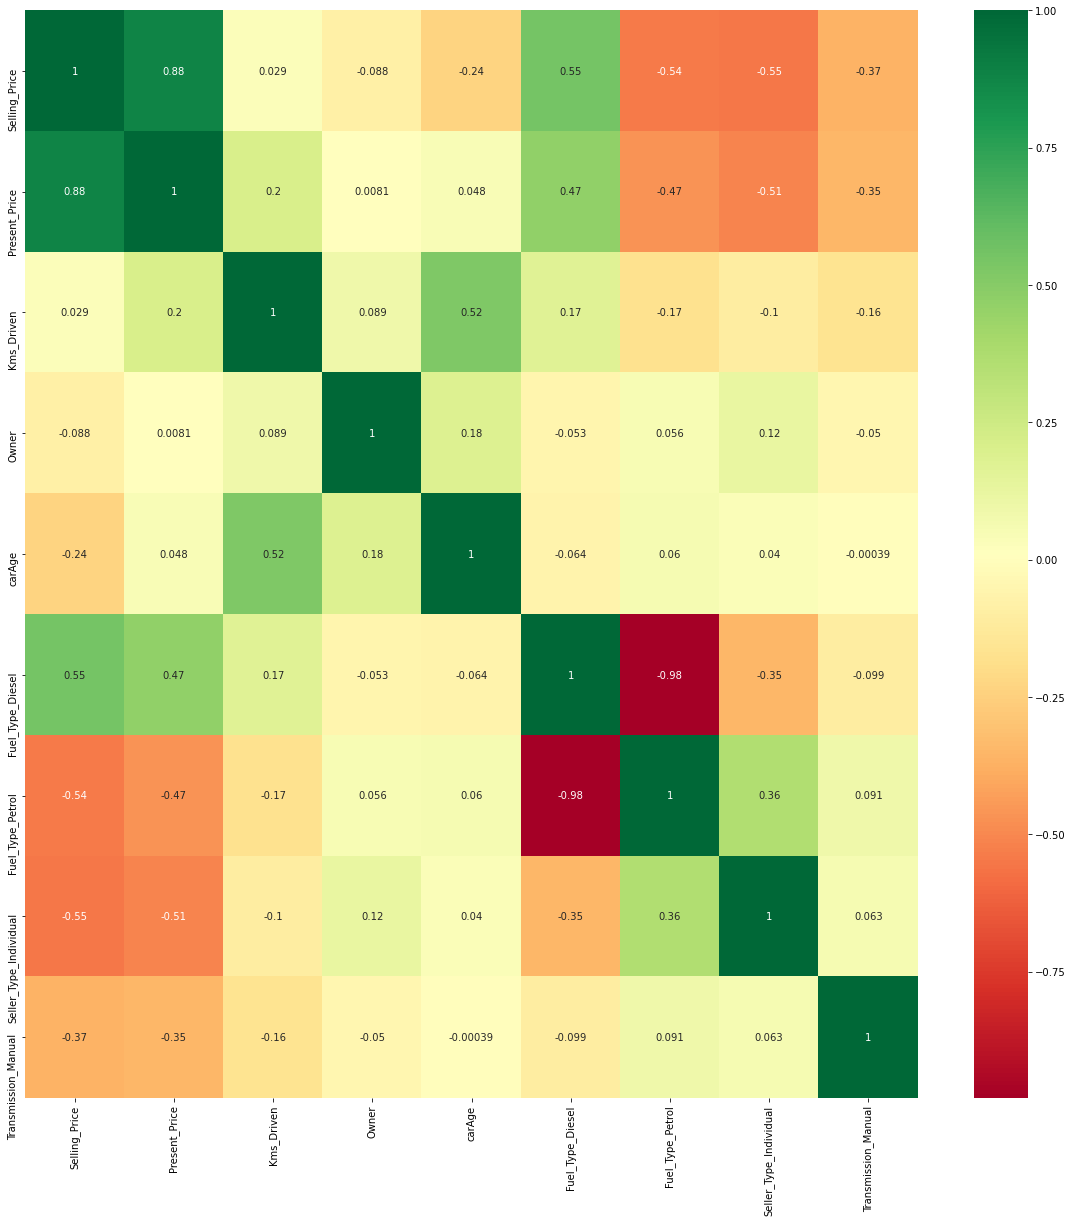

In [19]:
corrdf=df.corr()
top_corr_features=corrdf.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [20]:
#get xy
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,carAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
#feature importances
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[3.87872669e-01 4.04992402e-02 3.53425703e-04 8.03987931e-02
 2.16994209e-01 1.67708641e-02 1.33615079e-01 1.23495721e-01]


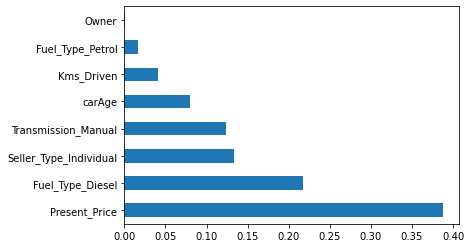

In [25]:
#plot the feature importances
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(8).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape

(240, 8)

In [28]:
#use random forest regressor
#Hyperparameter tuning

#randomized search cv
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200, num=12)] #no of trees in random forest
max_features=['auto','sqrt'] #no of featues to consider at every split
max_depth=[int(x) for x in np.linspace(5,30, num=6)] #max levels in tree
min_samples_split=[2,5,10,15,100] #min samples required to split a node
min_samples_leaf=[1,2,5.10] #min samples required at each leaf

In [29]:
search_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [31]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=search_grid, scoring='neg_mean_squared_error',n_iter=10,
                            cv=5, verbose=2, random_state=42, n_jobs=1)

In [32]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5.1, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1100, min_sample

/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5.1, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5.1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5.1, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5.1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5.1, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=1

/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30 


/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adi01/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = sel

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=5.1, max_features=sqrt, max_depth=30, total=   0.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5.1],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
#predict the data
predictions=rf_random.predict(X_test)

In [34]:
predictions

array([ 0.20116655,  0.52572314,  5.8303593 ,  5.70525267,  2.70917276,
        0.25357119,  6.03814466,  3.48839369,  0.52376665,  1.47335328,
        8.32872681,  2.45859208,  0.232355  ,  7.12197747,  0.65443424,
        0.43763947,  6.90622449,  0.77829794,  7.06438366,  5.15930178,
        0.58911638,  0.61389796,  0.3870853 ,  1.18002967,  0.52396353,
        0.21309436,  4.23425699,  4.95359051,  0.20123911,  5.63842191,
        1.12381799,  3.6053702 ,  3.49026349,  3.17524313,  7.16410118,
        2.92540609, 21.94334688,  3.97174126,  4.41643795,  9.48771222,
        9.19916663,  5.26662586, 15.84214428,  2.99206954,  1.98293827,
        8.30172678,  7.14379175,  0.33108927,  7.12356078,  5.10401267,
       21.09973036,  0.19561724,  0.56143553,  6.93171288,  5.10104636,
        1.16767685,  8.28428961,  4.83463899,  0.5906028 ,  8.30172678,
       17.76805774])

/home/adi01/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

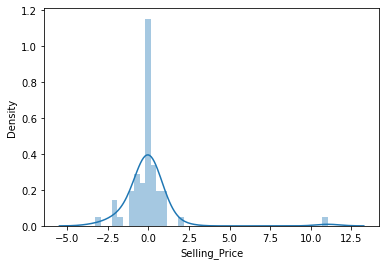

In [35]:
sns.distplot(y_test-predictions)

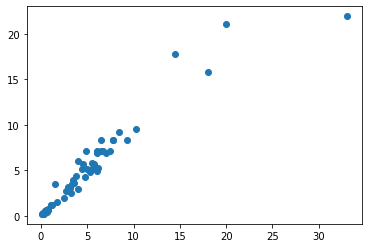

In [36]:
plt.scatter(y_test, predictions)

In [37]:
#save the model
import pickle

#create and open the file that will store the data
f=open('random_forest_regression_model.pkl', 'wb') #write-byte mode 

pickle.dump(rf_random,f) #dump model info into the file